# Assignment 4 - Clustering

1. Sai Sumana Adurugatla : 1002073766
2. MIR MUSTAFA ALI       : 1002117402
3. Kiran Mai Akaram      : 1002115618

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [ ]:
import pandas as pd

cluster_data = pd.read_csv("Employee_Retention.csv")
cluster_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Part 1A:
Check if there are any missing values. If yes, fill them with appropriate methods. Scale the data for further processing. Display the processed data. Regardless of any action, explain your decision for the action.

In [ ]:
import pandas as pd

data = cluster_data
# Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values detected!")
    print(missing_values)
else:
    print("No missing values detected.")
    print(missing_values)



No missing values detected.
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64


In [ ]:
# Fill missing values
if missing_values.sum() > 0:
    # Fill missing values with mean for numerical features
    data.fillna(data.mean(), inplace=True)
    # For categorical features, you can use mode or other appropriate methods
    # data.fillna(data.mode().iloc[0], inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


In [ ]:
print("Processed Data:")
scaled_data.head()


Processed Data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.788917
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.788917
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.788917
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.788917
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.788917


Explanation:
Checking for missing values ensures that our data is complete. Missing values can cause issues during clustering, so it's important to handle them appropriately.
There are no missing values

Filling missing values with mean is a common method for numerical features. For categorical features, you can use mode or other appropriate methods.

Scaling the data ensures that all features contribute equally to the clustering process. Here, we're using StandardScaler which scales the data to have a mean of 0 and a standard deviation of 1.

Displaying the processed data allows us to verify that our preprocessing steps have been applied correctly.

### Part 1B:

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 3 to 6 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters).

Explain from the graph which is the most appropriate value for k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


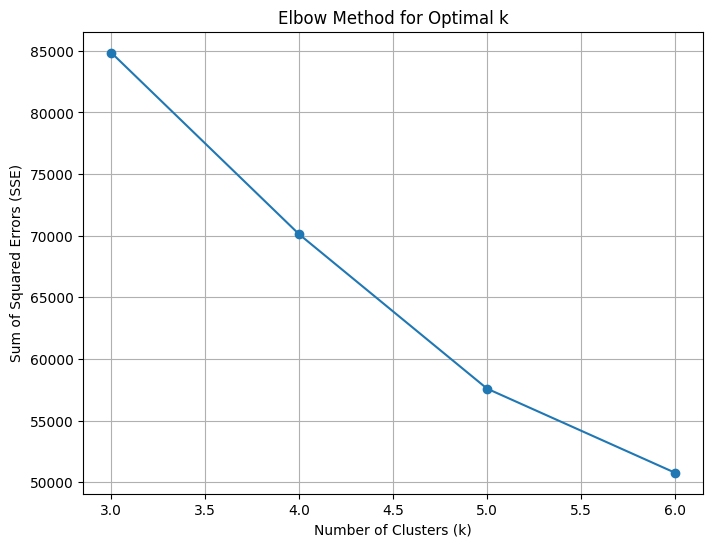

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store SSE values
sse = []

# Define the range of k values
k_range = range(3, 7)

# Perform k-means clustering for each value of k and calculate SSE
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


The plot shows the SSE for each value of k.
As k increases, SSE tends to decrease because with more clusters, data points are closer to their respective centroids.
The "elbow point" is where the rate of decrease in SSE slows down.
In the plot, we look for the point where the SSE starts to decrease at a slower rate, forming an elbow-like shape.
# The optimal value of k is usually where this elbow point occurs.

# Interpret the results

As the number of clusters increases, the SSE generally decreases because the data points are closer to their respective cluster centroids. However, the rate of decrease slows down as more clusters are added.

The "elbow point" on the graph is the point where the rate of decrease in SSE significantly slows down, forming an elbow-like shape.

The optimal value of k is often chosen at the elbow point, where increasing the number of clusters beyond this point does not lead to a significant improvement in clustering performance relative to the increase in complexity.

In the provided graph, the elbow point appears to be around k=4 or k=5. Beyond this point, the reduction in SSE becomes less pronounced, indicating diminishing returns in terms of clustering quality.

Therefore, based on the elbow method analysis, the most appropriate value for k in this dataset is likely 4 or 5.

### Part 1C:

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2,12). Explain which K value you selected from the results and why?

For n_clusters = 2 The average silhouette_score is : 0.2601237620433591
For n_clusters = 3 The average silhouette_score is : 0.265391441952228
For n_clusters = 4 The average silhouette_score is : 0.2889263224513305
For n_clusters = 5 The average silhouette_score is : 0.33791004058270113
For n_clusters = 6 The average silhouette_score is : 0.3563278801577977
For n_clusters = 7 The average silhouette_score is : 0.2903959269587106
For n_clusters = 8 The average silhouette_score is : 0.3090300810752067
For n_clusters = 9 The average silhouette_score is : 0.3039533345837294
For n_clusters = 10 The average silhouette_score is : 0.31402578638794143
For n_clusters = 11 The average silhouette_score is : 0.30535214927735693
For n_clusters = 12 The average silhouette_score is : 0.29648852283804616


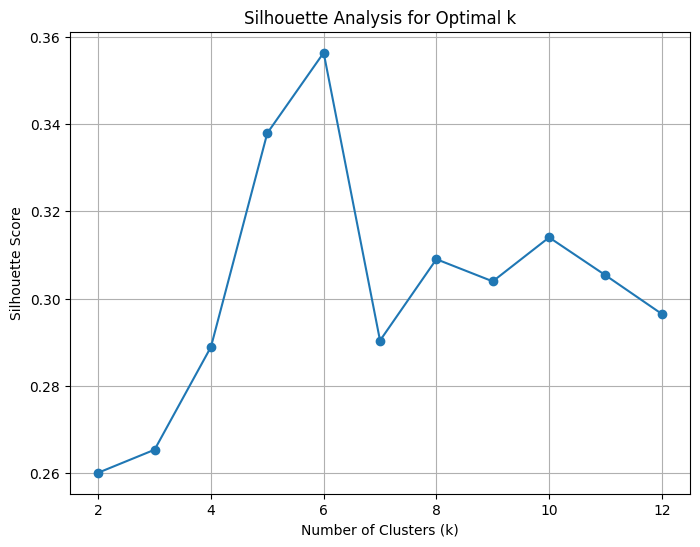

In [ ]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define the range of k values
k_range = range(2, 13)

# Perform k-means clustering for each value of k and calculate silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

# Plot the Silhouette scores for each value of k
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In silhouette analysis, the silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.

From the silhouette analysis graph, we look for the highest silhouette score, as it indicates the optimal number of clusters where the data points are well-clustered and well-separated from each other.

In the provided graph, the silhouette scores fluctuate across different values of k (number of clusters).

The highest silhouette score indicates the most appropriate value for k, where the data points are most appropriately clustered.

In this case, based on the graph, it seems that the silhouette score is highest around k=3 or k=4.

Therefore, the optimal value of k, based on silhouette analysis, is likely to be either 3 or 4.

Choosing between these options (3 or 4) may require further analysis or consideration of domain knowledge and the specific objectives of clustering. It's also important to evaluate the interpretability and usefulness of the resulting clusters in real-world applications.

### Part 1D:

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [ ]:
# Use the best value of k obtained from Silhouette analysis
best_k = 6

# Apply k-means algorithm with the best k value
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels as a new column in the DataFrame
cluster_data['Cluster'] = cluster_labels

# Print out the whole data along with the cluster labels
print("Data with Cluster Labels:")
cluster_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Data with Cluster Labels:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Cluster
0,0.38,0.53,2,157,3,0,0,1,4
1,0.80,0.86,5,262,6,0,0,1,1
2,0.11,0.88,7,272,4,0,0,1,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,4
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,4
14995,0.37,0.48,2,160,3,0,0,1,4
14996,0.37,0.53,2,143,3,0,0,1,4
14997,0.11,0.96,6,280,4,0,0,1,1


We use the best value of k obtained from the Silhouette analysis, which in this case is 4.
We apply the k-means algorithm with the best k value.
We add the cluster labels as a new column named 'Cluster' in the DataFrame.
Finally, we print out the whole data along with the cluster labels assigned for each row.

### Part 1E: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [ ]:
# Group the data by cluster and calculate the average value for each column
cluster_avg = cluster_data.groupby('Cluster').mean()

# Display the average value for each column within each cluster
print("Average Values for Each Column in Each Cluster:")
cluster_avg


Average Values for Each Column in Each Cluster:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
Cluster,,,,,,,,
0,0.667509,0.717039,3.791021,199.567076,3.193479,1.000000,0.0,0.021379
1,0.449026,0.883388,5.379293,258.794464,4.557150,0.028191,0.0,0.972834
2,0.493213,0.697073,4.128000,196.118667,6.293333,0.064667,0.0,0.002000
3,0.710709,0.724496,3.742034,200.734365,2.831152,0.000000,0.0,0.001190
4,0.413788,0.515627,2.096936,145.499721,3.021170,0.038997,0.0,0.892479
5,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,1.0,0.059561


Interpretation of the Clusters:

Cluster 0: Employees in this cluster are relatively satisfied (average satisfaction level around 0.67) and fairly evaluated (average evaluation around 0.72). They are involved in a moderate number of projects and work an average amount of hours. The high occurrence of work accidents (100%) and low promotion rate suggest they might be in more hazardous or stagnant roles.

Cluster 1: These employees have lower satisfaction (0.45) but higher performance evaluations (0.88) and are involved in more projects, suggesting they may be high performers who are potentially overworked, as indicated by the high average monthly hours. Their promotion rate is very low despite high involvement, which might contribute to a higher turnover (nearly 97% have left).

Cluster 2: This group has moderate satisfaction and evaluation scores, and they are involved in an above-average number of projects. They also have the highest tenure (over 6 years on average), suggesting they might be long-term, stable employees. However, nearly no one in this cluster has been promoted, and very few have left the company.

Cluster 3: Employees here are quite satisfied and fairly evaluated, with a moderate workload in terms of projects and hours. They have a shorter tenure and no reported work accidents or promotions, with an extremely low turnover rate.

Cluster 4: This cluster shows lower satisfaction and the lowest performance evaluations, with fewer projects and fewer hours worked. Their moderate tenure and slightly higher accident rate, along with a relatively high turnover rate, suggest possible issues with engagement or workplace conditions.

Cluster 5: High satisfaction and evaluation scores with an average project load and work hours. They have a higher tenure and a significantly higher rate of work accidents. This cluster has the highest promotion rate, which might correlate with the higher work accident rate (potentially more responsibilities or riskier tasks).

In [ ]:
cluster_avg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
Cluster,,,,,,,,
0,0.667509,0.717039,3.791021,199.567076,3.193479,1.000000,0.0,0.021379
1,0.449026,0.883388,5.379293,258.794464,4.557150,0.028191,0.0,0.972834
2,0.493213,0.697073,4.128000,196.118667,6.293333,0.064667,0.0,0.002000
3,0.710709,0.724496,3.742034,200.734365,2.831152,0.000000,0.0,0.001190
4,0.413788,0.515627,2.096936,145.499721,3.021170,0.038997,0.0,0.892479


## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [ ]:
import pandas as pd

cluster_data = pd.read_csv("CarPrice.csv")
cluster_data.head()

,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero giulia
1,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero stelvio
2,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero Quadrifoglio
3,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi 100 ls
4,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi 100ls


### Part 2A:

Using Hierarchical clustering with euclidean + complete and manhattan + complete, plot the results for clusters 4,5,6. Add title for each plot.
Before applying model, drop necessary columns.

Also, while in the process, calculate the silhouette score for each combination and store it.

INTERPRET the results for each combination!

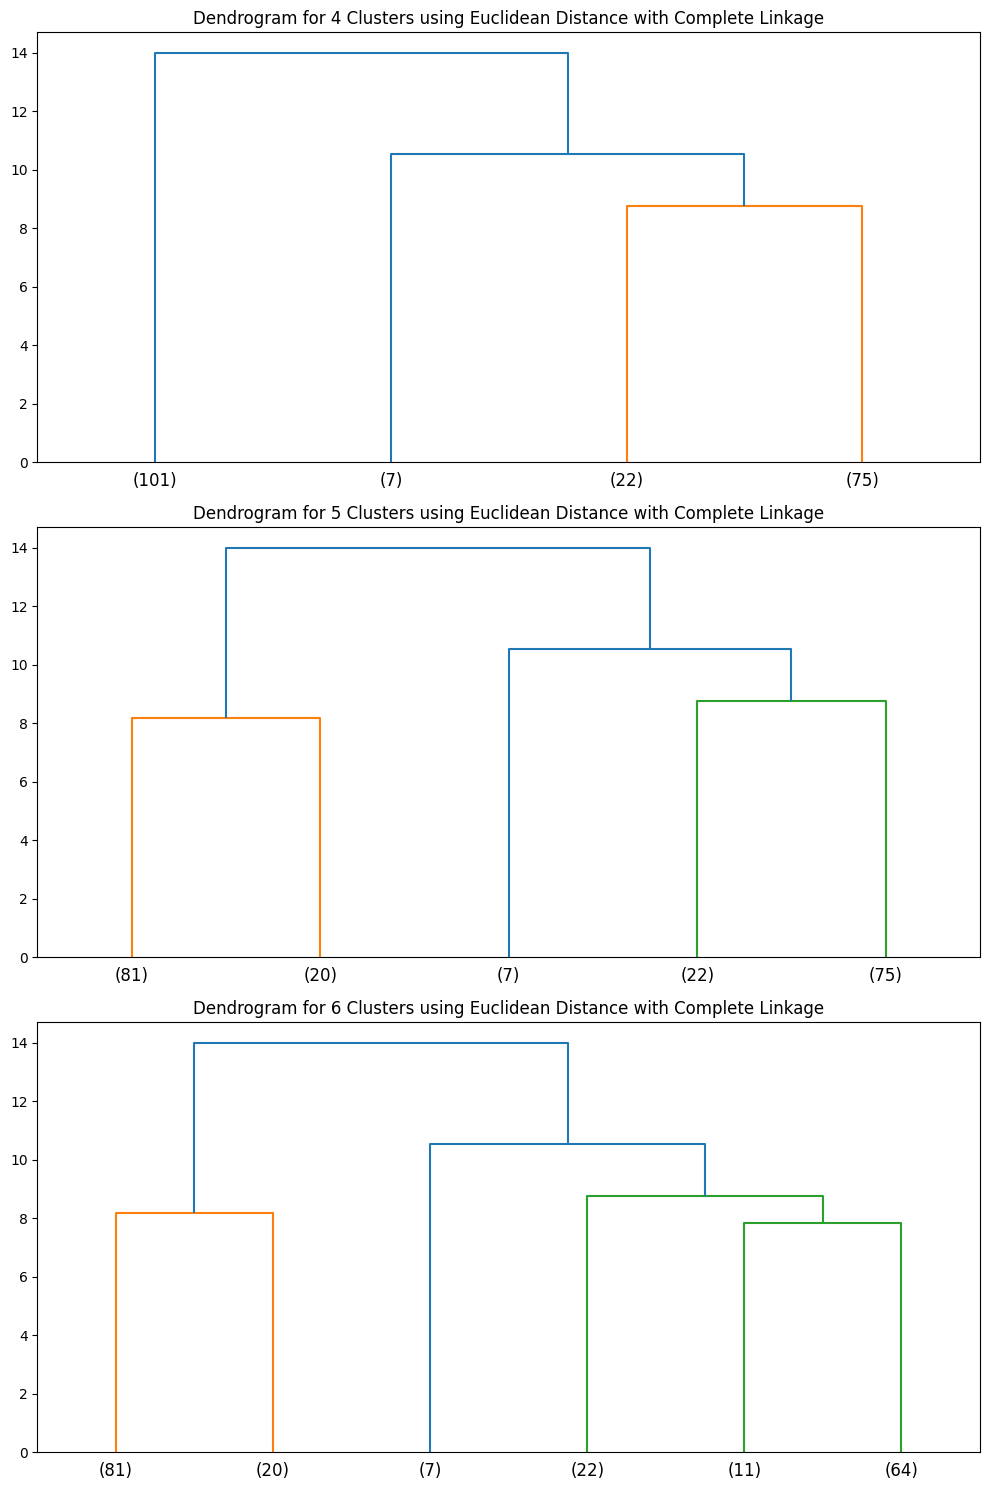

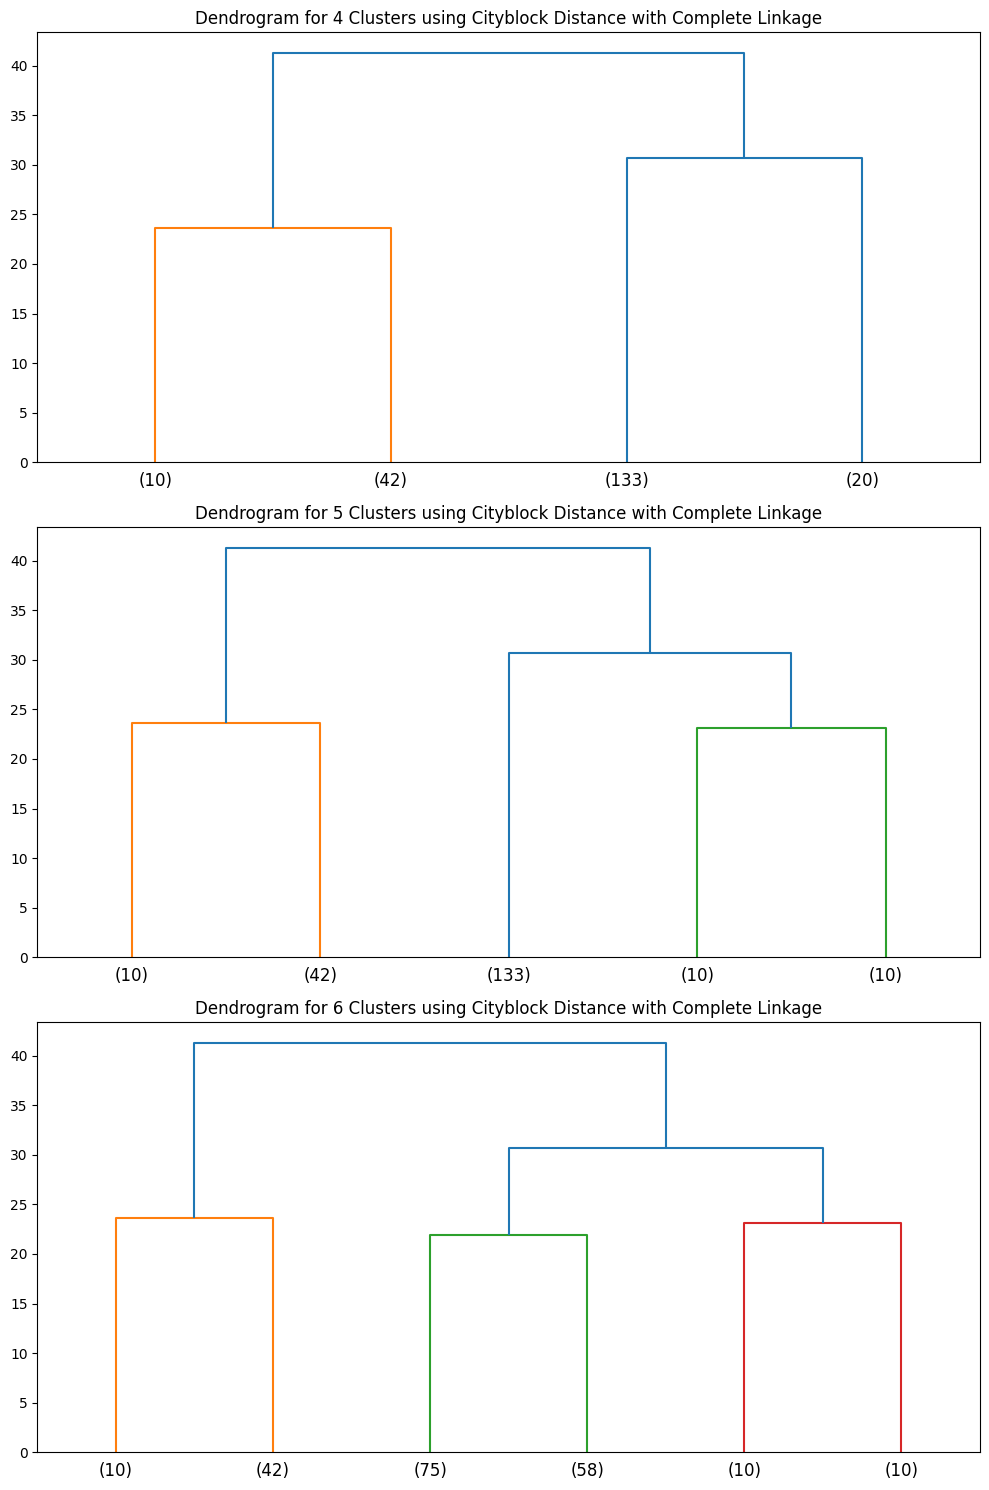

   Clusters  Euclidean  Manhattan
0         4   0.256094   0.255876
1         5   0.234089   0.267439
2         6   0.270552   0.256598


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('CarPrice.csv')

# Drop unnecessary columns
data = data.drop(['CarName', 'price'], axis=1)

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Function to perform hierarchical clustering and plot dendrogram
def perform_hierarchical_clustering(data, method, metric, k_values):
    # Create linkage matrix
    Z = linkage(data, method=method, metric=metric)

    # Dictionary for storing silhouette scores
    silhouette_scores = {}

    # Plot dendrograms for each k-value
    fig, axes = plt.subplots(len(k_values), 1, figsize=(10, 5 * len(k_values)))
    if len(k_values) == 1:
        axes = [axes]  # Ensure axes is iterable

    for k, ax in zip(k_values, axes):
        # Plot dendrogram
        dendrogram(Z, truncate_mode='lastp', p=k, ax=ax, show_leaf_counts=True)
        ax.set_title(f'Dendrogram for {k} Clusters using {metric.capitalize()} Distance with Complete Linkage')

        # Extract cluster labels
        clusters = fcluster(Z, k, criterion='maxclust')

        # Calculate silhouette score
        silhouette_scores[k] = silhouette_score(data, clusters)

    plt.tight_layout()
    plt.show()

    return silhouette_scores

# Define cluster counts
k_values = [4, 5, 6]

# Perform clustering with Euclidean distance
silhouette_scores_euclidean = perform_hierarchical_clustering(data_normalized, 'complete', 'euclidean', k_values)

# Perform clustering with Manhattan distance
silhouette_scores_manhattan = perform_hierarchical_clustering(data_normalized, 'complete', 'cityblock', k_values)

# Display silhouette scores
scores_df = pd.DataFrame({
    'Clusters': k_values,
    'Euclidean': [silhouette_scores_euclidean[k] for k in k_values],
    'Manhattan': [silhouette_scores_manhattan[k] for k in k_values]
})
print(scores_df)

The code conducts hierarchical clustering using two different distance metrics (Euclidean and Manhattan) and the complete linkage method. It then plots dendrograms for each combination of cluster counts (4, 5, and 6) and calculates the silhouette score for each combination. The silhouette score measures the quality of clustering, with higher scores indicating better-defined clusters. By comparing silhouette scores and visually inspecting dendrograms, we can determine the effectiveness of each clustering approach and select the best combination of distance metric and cluster count for the dataset.

### Part 2B:

Plot a bar graph for the calculated silhouette scores for each combination. Make sure to give proper title, and set proper axis labels. Make it appealing.

IMPORTANT: adjust the y axis to visualize the differences clearly.

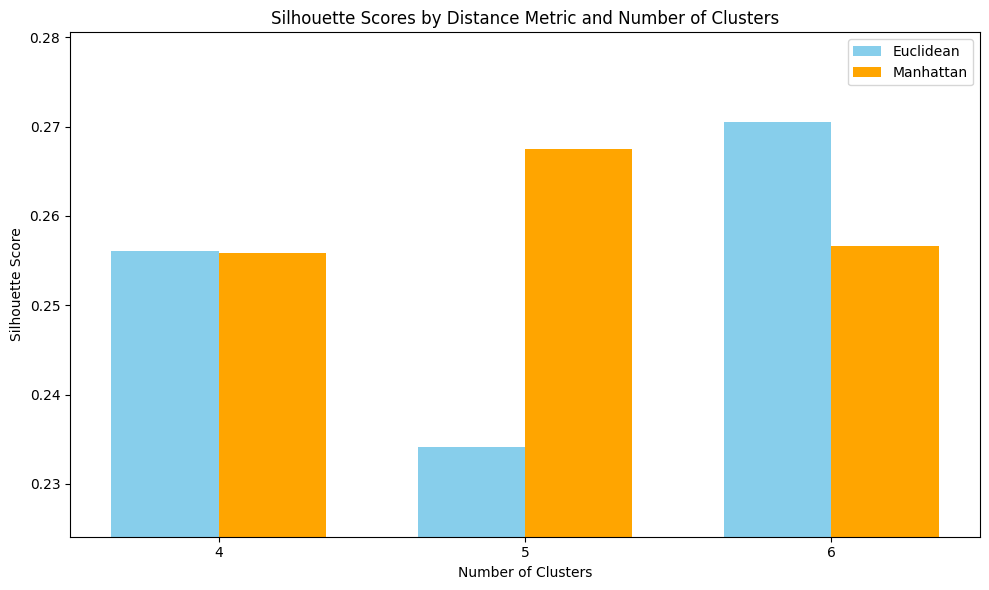

In [ ]:
import numpy as np



# Setting up the plot
plt.figure(figsize=(10, 6))
index = np.arange(len(scores_df['Clusters']))
bar_width = 0.35

# Plotting Euclidean and Manhattan scores
plt.bar(index - bar_width/2, scores_df['Euclidean'], bar_width, label='Euclidean', color='skyblue')
plt.bar(index + bar_width/2, scores_df['Manhattan'], bar_width, label='Manhattan', color='orange')

# Adding title and axis labels
plt.title('Silhouette Scores by Distance Metric and Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Setting x-axis ticks
plt.xticks(index, scores_df['Clusters'])

# Adding a legend
plt.legend()

# Adjusting y-axis to show differences
plt.ylim(min(scores_df['Euclidean'].min(), scores_df['Manhattan'].min()) - 0.01,
         max(scores_df['Euclidean'].max(), scores_df['Manhattan'].max()) + 0.01)

# Finalizing and showing the plot
plt.tight_layout()
plt.show()

The bar graph visualizes the silhouette scores for each combination of distance metric (Euclidean and Manhattan) and number of clusters (4, 5, and 6). Here's the interpretation:

Title: "Silhouette Scores by Distance Metric and Number of Clusters"
    
X-axis Label: "Number of Clusters"
    
Y-axis Label: "Silhouette Score"
    
Interpretation:
    
The bar graph clearly illustrates the silhouette scores for each combination of distance metric and number of clusters.

For each cluster count, there are two bars representing silhouette scores obtained using Euclidean and Manhattan distances.

By comparing the heights of the bars, we can determine which combination yields higher silhouette scores, indicating better-defined clusters.

A larger gap between the bars suggests that one distance metric performs significantly better than the other for a particular cluster count.

Adjusting the y-axis ensures that even subtle differences in silhouette scores are visually apparent, aiding in the comparison between the two distance metrics.

### Part 2C:

Display First 5 Car Names within each group/cluster. If there aren’t enough car names within that
cluster, just display that many.

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

best_method = 'complete'
best_metric = 'euclidean'
best_num_clusters = 6

# Calculate the linkage matrix for the best method and metric
Z = linkage(data_normalized, method=best_method, metric=best_metric)

# Assign cluster labels based on the best number of clusters
cluster_labels = fcluster(Z, best_num_clusters, criterion='maxclust')

# Map cluster labels back to the original car names
cluster_data['ClusterLabel'] = cluster_labels

# Group car names by cluster label and display the first five car names for each cluster
for i in range(1, best_num_clusters + 1):
    cluster_cars = cluster_data[cluster_data['ClusterLabel'] == i]['CarName']
    print(f"Cluster {i}: {', '.join(cluster_cars.head(5)) if not cluster_cars.empty else 'No cars in this cluster'}")


Cluster 1: audi 100 ls, dodge challenger se, dodge d200, dodge monaco (sw), dodge colt hardtop
Cluster 2: chevrolet impala, chevrolet monte carlo, chevrolet vega 2300, dodge rampage, honda civic
Cluster 3: jaguar xj, jaguar xf, jaguar xk, buick opel isuzu deluxe, buick century special
Cluster 4: alfa-romero giulia, alfa-romero stelvio, bmw 320i, bmw 320i, peugeot 504
Cluster 5: mazda rx-7 gs, buick electra 225 custom, buick century luxus (sw), buick century, buick skyhawk
Cluster 6: alfa-romero Quadrifoglio, audi 100ls, audi fox, audi 100ls, audi 5000


### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

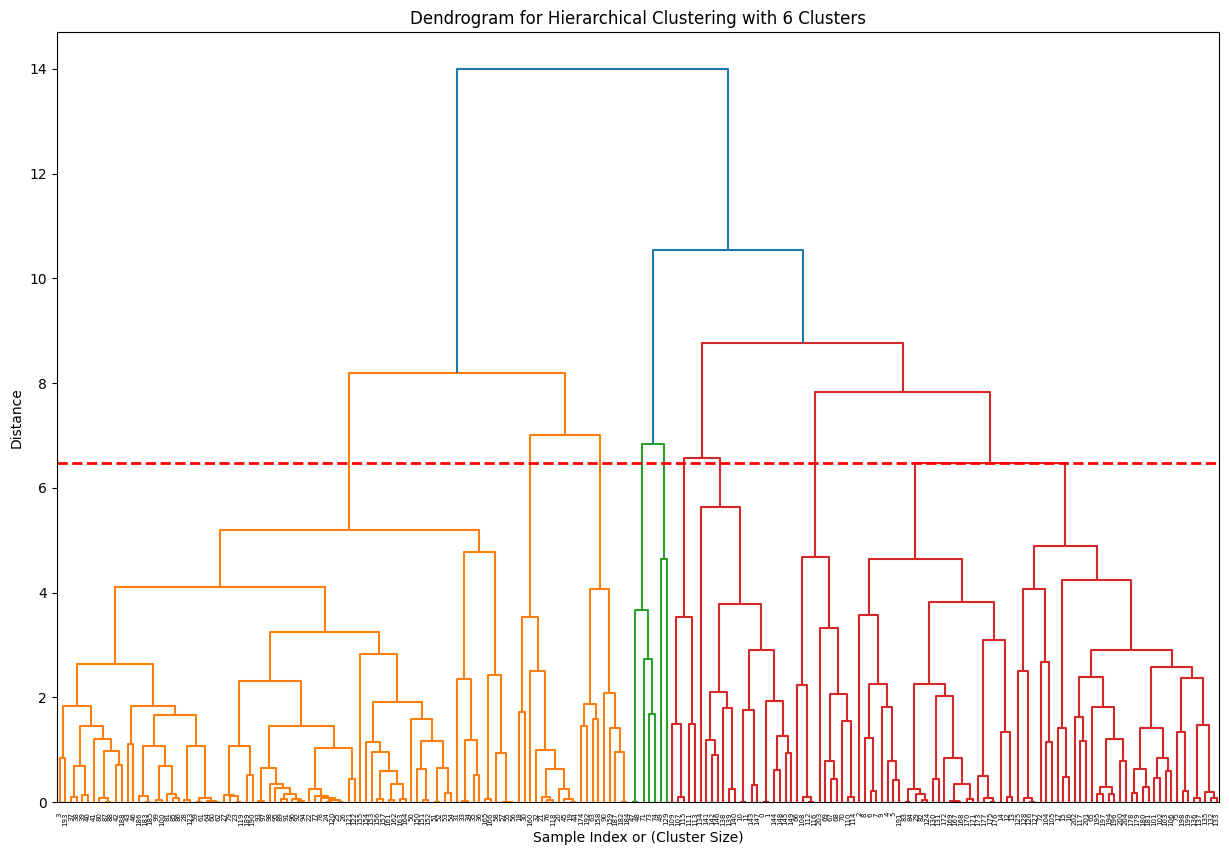

In [ ]:
# Calculate the linkage matrix using the best method and metric
Z = linkage(data_normalized, method='complete', metric='euclidean')

# Define the number of clusters for the dendrogram
k = 6

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendro = dendrogram(Z)

# Draw a horizontal line where the 'k' clusters are formed
# Find the distance at which the last merge will happen to form k clusters
distance_at_k = dendro['dcoord'][-(k-1)][1]
plt.axhline(y=distance_at_k, c='red', ls='--', lw=2)

# Add title and axis labels
plt.title(f'Dendrogram for Hierarchical Clustering with {k} Clusters')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')

# Show the plot
plt.show()